# CC5205-3 · Minería de Datos
## Hito 1 · Semestre 2025-1

### Integrantes
- Sofía Carmona F.
- Tomás Ubilla Zavala  
- Loonette Vilelgas B.
- Diego Rojas Wasaff  
- Nahuel Won
### Equipo Docente
- Profesor: Valentín Barriere  
- Auxiliar: Roberto Rivera C.

---


# Introducción

---
 Spotify es una de las plataformas de streaming musicales más grandes del mundo. Este guarda enormes cantidades de datos sobre canciones, artistas, álbumes, características melódicas, entre otras. Analizar y estudiar estos datos puede ayudar a detectar patrones musicales, cómo distintas canciones se relacionan entre sí y cómo organizar estas distintas melodías. Para ello, se analiza un dataset de 114,000 canciones de Spotify, creada por Priyam Choksi, que incluyen variables como popularidad, energía, valencia, tiempo, género, entre otras. El análisis de estos datos es interesante porque ayuda a entender y predecir patrones musicales, asi como a agrupar canciones según distintas variables mediante distintas técnicas como el clustering. 

# Exploración de datos

---


In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

spotify = pd.read_csv("data/data_principal.csv")

In [69]:
spotify.describe(include='all')

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
count,114000.000000,114000,113999,113999,113999,114000.000000,1.140000e+05,114000,114000.000000,114000.000000,...,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000
unique,NaN,89741,31437,46589,73608,NaN,NaN,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114
top,NaN,6S3JlDAGk3uu3NtZbPnuhS,The Beatles,Alternative Christmas 2022,Run Rudolph Run,NaN,NaN,False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,acoustic
freq,NaN,9,279,195,151,NaN,NaN,104253,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000
mean,56999.500000,NaN,NaN,NaN,NaN,33.238535,2.280292e+05,NaN,0.566800,0.641383,...,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035,NaN
std,32909.109681,NaN,NaN,NaN,NaN,22.305078,1.072977e+05,NaN,0.173542,0.251529,...,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621,NaN
min,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000e+00,NaN,0.000000,0.000000,...,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,28499.750000,NaN,NaN,NaN,NaN,17.000000,1.740660e+05,NaN,0.456000,0.472000,...,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000,NaN
50%,56999.500000,NaN,NaN,NaN,NaN,35.000000,2.129060e+05,NaN,0.580000,0.685000,...,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000,NaN
75%,85499.250000,NaN,NaN,NaN,NaN,50.000000,2.615060e+05,NaN,0.695000,0.854000,...,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000,NaN


Se puede observar las columnas y cuantas filas tiene cada una; el promedio, la varianza , el mínimo, el máximo y los percentiles de las variables numéricas del dataset.

- "Unnamed: 0" no es una columna que aporte información.
- "duration_ms" está en otra escala, al igual que "popularity" y "tempo"


In [70]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

No existe una gran proporción de nulos: solo 1 en 3 columnas.
Existe solo 1 columna booleana: "explicit".

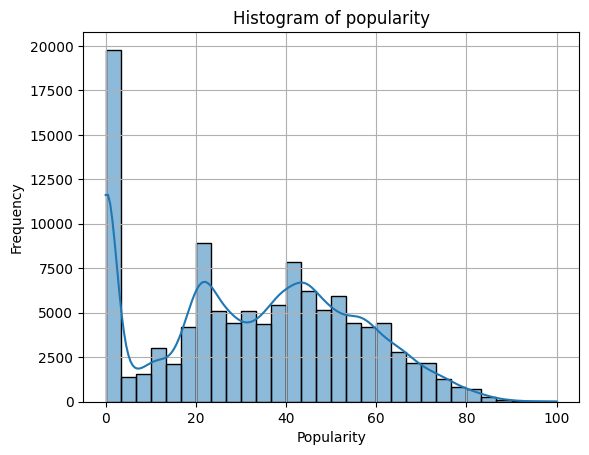

In [71]:
# Histograma de popularidad de las canciones
sns.histplot(spotify['popularity'], bins=30, kde=True)

plt.title('Histogram of popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.grid()
plt.show()

Gran cantidad de las canciones tiene popularidad 0 o muy baja, mientras que una cantidad baja respecto al total tiene una popularidad alta o cercana a 100.

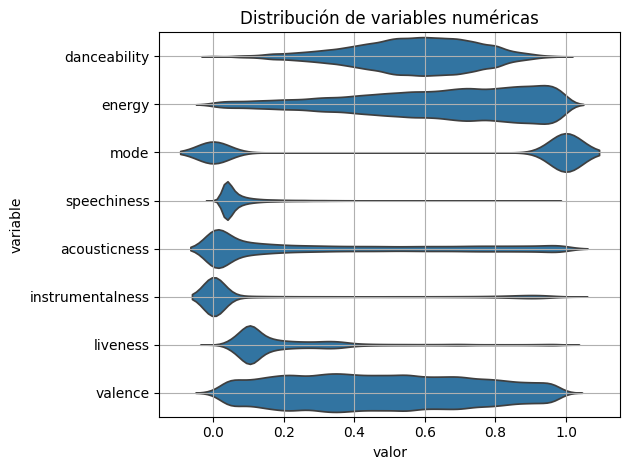

In [72]:
numericas = spotify.select_dtypes(include='number').drop(columns=['Unnamed: 0', 'duration_ms', 'tempo', 'popularity', 'loudness', 'key', 'time_signature'])

long_df = pd.melt(numericas, var_name='variable', value_name='valor')

sns.violinplot(data=long_df, x='valor', y='variable', orient='h', inner=None, scale='width')
plt.title('Distribución de variables numéricas')
plt.grid()
plt.tight_layout()
plt.show()

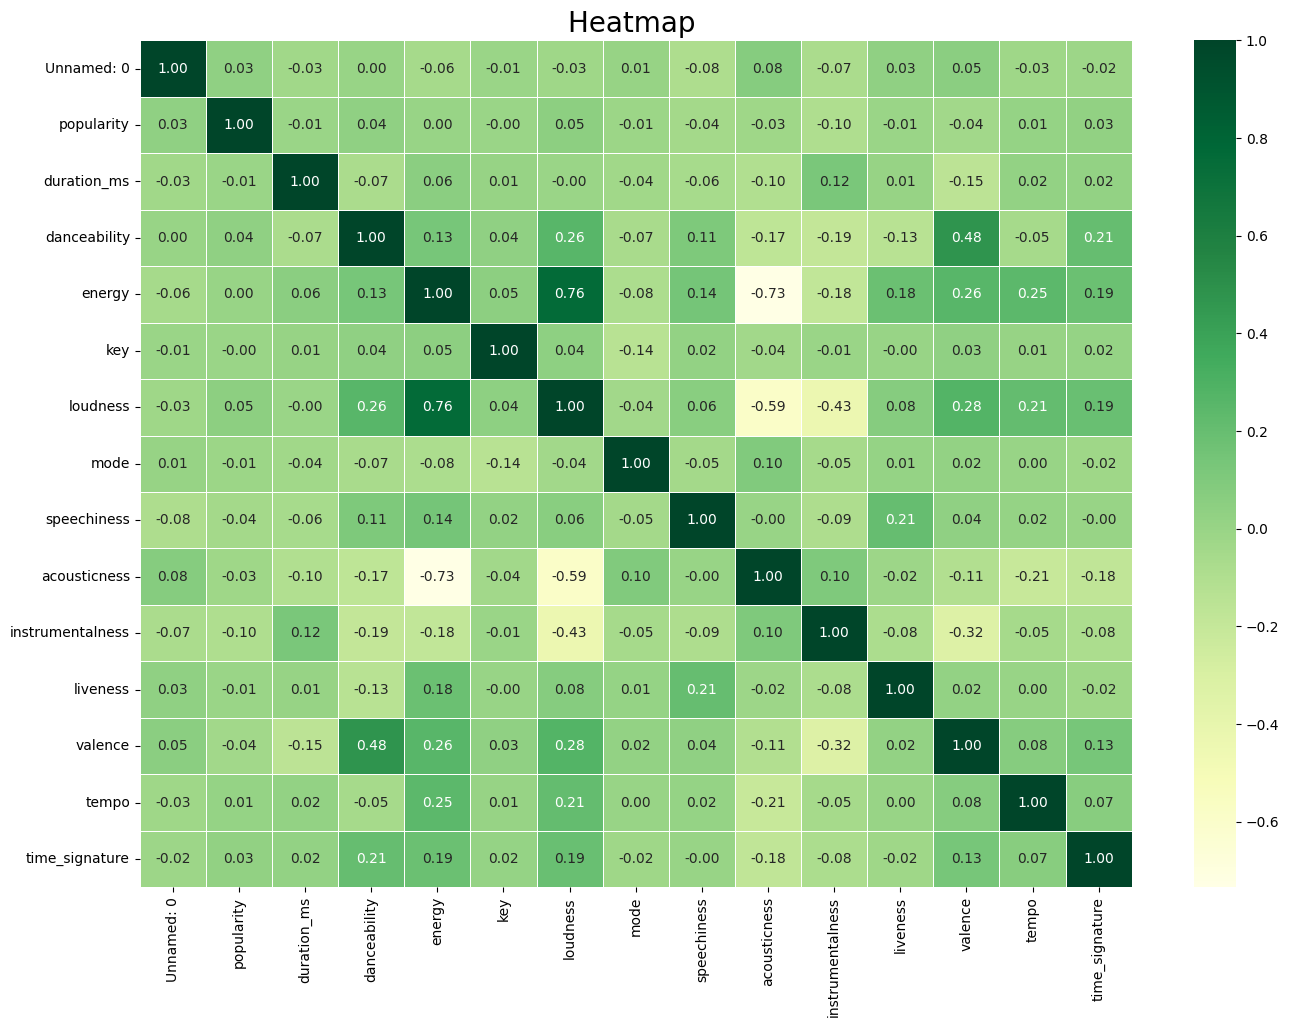

In [73]:
##HeatMap para todas las correlaciones de los atributos de la tabla
##Estudio de las correlaciones entre atributos

numeric_cols = spotify.select_dtypes(include=['number']).columns

f, ax = plt.subplots(figsize=(16, 11))

corr_matrix = spotify[numeric_cols].corr()
sns.heatmap(corr_matrix, cmap='YlGn', annot=True, fmt=".2f", linewidths=.5)



plt.title('Heatmap ', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


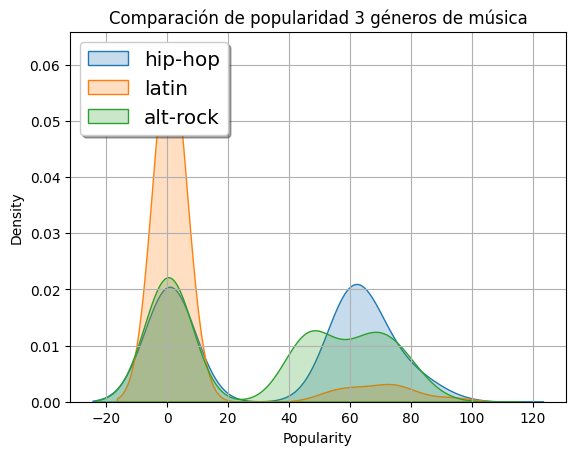

In [74]:
fig, ax = plt.subplots()

hip_hop = spotify[spotify['track_genre'] == 'hip-hop']
latin = spotify[spotify['track_genre'] == 'latin']
rock = spotify[spotify['track_genre'] == 'alt-rock']
sns.kdeplot(hip_hop['popularity'], label='hip-hop', ax=ax, fill=True)
sns.kdeplot(latin['popularity'], label='latin', ax=ax, fill=True)
sns.kdeplot(rock['popularity'], label='alt-rock', ax=ax, fill=True)

legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')

ax.set_title('Comparación de popularidad 3 géneros de música')
ax.set_xlabel('Popularity') # Update x-axis label

plt.grid()
plt.show()

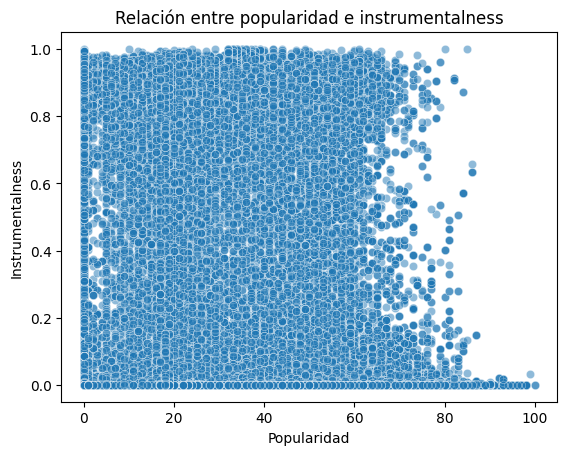

Correlación popularity vs instrumentalness: -0.09513920344466378


In [75]:
sns.scatterplot(data=spotify, x='popularity', y='instrumentalness', alpha=0.5)
plt.title('Relación entre popularidad e instrumentalness')
plt.xlabel('Popularidad')
plt.ylabel('Instrumentalness')
plt.show()

# Correlación
print("Correlación popularity vs instrumentalness:", spotify[['popularity', 'instrumentalness']].corr().iloc[0,1])

No se observa tendencia clara, pero no existen registros con alta popularidad y alta "instrumentalness"

# Preguntas y Problemas

---
* ¿Se puede predecir el género de una canción en base a otras variables?
* ¿Aplicar Clustering permite generar grupos que aporten información al modelo?
* ¿Cómo varía el sentimiento predominante de las canciones de los diferentes géneros?


# Propuesta experimental

---

## P1

* Aplicar modelos de clasificación para predecir el género de una canción:


## P2


* Evaluar clustering para encontrar grupos de canciones similares: Aplicar distintos métodos de clustering como K-Means y DBSCAN


## P3

Se plantea como hipótesis que cada canción tiene un sentimiento predominante en función de su letra, y que cada género musical presenta una tendencia promedio de sentimiento, dada por las canciones que lo componen. Para validar esta hipótesis, se propone el siguiente enfoque metodológico:

En primer lugar, se combinará la base de datos actual con fuentes externas que contengan la letra de cada canción, utilizando como claves el nombre de la canción y el nombre del artista. Esta integración permitirá conservar los atributos originales y añadir el contenido lírico a cada registro.

Por simplicidad, se trabajará inicialmente solo con canciones en inglés, para facilitar el análisis de sentimiento utilizando herramientas preexistentes. Luego, se aplicará TF-IDF para transformar las letras en representaciones numéricas a través de vectores que capturen la relevancia de las palabras dentro del corpus.

Teniendo esto, se propone utilizar un modelo de análisis de sentimiento preentrenado para estimar el sentimiento predominante de cada letra, etiquetando cada canción como positiva, negativa o neutral. También se puede agrupar por género, donde se calculará la distribución y el promedio de sentimiento por género musical, y se analizarán posibles patrones o diferencias.

Este enfoque permitirá explorar si existe una relación entre el género musical y el tipo de emociones predominantes en sus letras.

# Experimento preliminar

---

## Pregunta 1 : Predicción

En la siguiente sección se investigará y discutirá la pregunta:
¿Es posible predecir el género musical mediante los otros atributos de la tabla?
Para ello se utilizaron distinas técnicas de preprocesamiento y se usarán 2 técnicas de clasificación:
    
    -K neighbors 
    -Random Forest

Para el modelo KNN se pre-procesó  el dataframe escalando los datos con MinMaxScaler y se buscó el mejor K con GridSearchCV. Los resultados fueron los siguientes: 
        
        .F1 para kneighbors sin weigths: 0.15261185805598412
        .F1 para kneighbors con weigths: 0.16424950407758432

Estos resultados pueden estudiarse en el código adjunto.

Debido al bajo porcentaje de éxito y evaluando que el data frame original tenía muchos atributos relevantes para la predicción, lo cual no es conveniente para este modelo, se procedió a utilizar el modelo de Random Forest, que no depende de la cantidad de atributos. Para ello, se escalaron los datos y se evalúo el porcentaje accurecy, que fue de más o menos un 30% de éxito. 

Debido al bajo porcentaje de predicción que se obtuvo, se procesaron los datos con otras técnicas. Primero se consideró que la cantidad de clases que el modelo debía aprender eran muchas, por lo que se creó un diccionario de los géneros como muestra el siguiente código.

In [ ]:
##Creamos un diccionario de géneros, agrupando los géneros más parecidos entre sí.
dic_generos = {
    'latin': ['latin', 'latino', 'reggaeton', 'spanish', 'sertanejo', 'samba', 'tango','brazil', 'forro', 'salsa','mpb'],
    'rock_clasico' :['rock', 'alt-rock', 'rock-n-roll', 'garage', 'rockabilly', 'psych-rock', 'j-rock'],
    'metal': ['death-metal', 'black-metal', 'heavy-metal', 'metal-core', 'grindcore', 'metal','metalcore'],
    'rock_intenso' : ['punk', 'punk-rock', 'hardcore', 'grunge', 'emo', 'goth', 'hard-rock'],
    'pop': [ 'pop', 'world-music', 'pop-film', 'power-pop','british'],
    'pop-asia':['k-pop', 'j-pop', 'mandopop', 'cantopop', 'j-idol', 'j-dance'],
    'hiphop': ['trip-hop', 'hip-hop'],
    'disco': ['groove', 'dance', 'dancehall','disco'],
    'tech_club' : ['house', 'deep-house', 'minimal', 'minimal-techno','techno', 'chicago-house', 'detroit-techno', 'electro', 'club', 'hardstyle','edm'],
    'tech_exp' : ['dubstep', 'idm', 'breakbeat', 'electronic', 'industrial','afrobeat', 'drum-and-bass', 'dub', 'party'],
    'chill': ['study', 'ambient', 'acoustic', 'sleep', 'chill', 'trance', 'new-age','progressive-house','sad'],
    'reggae': ['ska', 'reggae','dancehall'],
    'classic': ['opera', 'classical', 'piano','gospel','show-tunes'],
    'kids': ['kids', 'disney', 'children'],
    'country': ['bluegrass', 'honky-tonk','country'],
    'blues': ['soul', 'funk', 'blues','r-n-b','jazz'],
    'romance': ['romance','singer-songwriter','songwriter'],
    'folklore': ['folk', 'turkish', 'iranian','indian','pagode','german','swedish','malay','french'],
    'other':['happy','comedy', 'guitar','anime'],
    'indie':['indie','alternative','indie-pop','synth-pop']
}

In [ ]:
dic_generos_numerico = {}
i = 0
for genero_principal, subgeneros in dic_generos.items():
    dic_generos_numerico[genero_principal] = i
    i += 1

mapeo_directo = {}
for genero_general, subgeneros in dic_generos.items():
    for sub in subgeneros:
        mapeo_directo[sub] = genero_general

df_spotify_forest['genero_general'] = df_spotify_forest['track_genre'].map(mapeo_directo)

df_spotify_forest['genero_numeric'] = df_spotify_forest['genero_general'].map(dic_generos_numerico)
df_spotify_filtrado = df_spotify_forest.dropna(subset=['genero_numeric']).copy()
df_spotify_filtrado['genero_numeric'] = df_spotify_filtrado['genero_numeric'].astype(int)
df_spotify_filtrado.head()

Como se quiere trabajar con números, se usó LabelEncoder para las columnas con variables categóricas. Estas fueron artists y album_name, la cuales podían aportar información sobre el género al que pertenecían. En general, incluir este cambio aumentó entre 3%-4% la predicción del modelo.

In [ ]:
df_spotify_filtrado.drop(['genero_general','track_genre'], axis = 1, inplace = True)
cat_cols = df_spotify_filtrado.select_dtypes(include=['object']).columns.to_list()
num_cols = [col for col in df_spotify_filtrado.columns if col not in cat_cols]
df_spotify_filtrado[cat_cols] = df_spotify_filtrado[cat_cols].apply(LabelEncoder().fit_transform)
y = df_spotify_filtrado['genero_numeric']
X=df_spotify_filtrado.drop(['genero_numeric'], axis = 1)

Finalmente, se entrenó el modelo con los datos escalados. El número de estimadores y profundidad del Random Forest fue estudiado, no obstante, el aumento de la predicción no era tan significante y el costo de ejecución si, se optó por el número de estimadores por default. 

Con el siguiente código se obtuvo un 47% de éxito en la predicción.

In [ ]:
sc = StandardScaler()
X_scaled=sc.fit_transform(X)
df_X_scaled=pd.DataFrame(X_scaled,columns=X.columns)
df_X_scaled.head()
X_train,X_test,y_train,y_test=train_test_split(df_X_scaled,y,test_size=0.20,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
f1 = f1_score(y_test, y_pred, average='macro')
print(f1)

Para visualizar mejor los resultados, observaremos con una matriz de confusión la predicción del modelo.

In [ ]:
![image.png](attachment:image.png)

**Análisis de resultados**
    
    *De la matriz podemos observar que géneros como Disco, Latin y Hip-Hop son algunos  que al modelo le cuesta predecir correctamente. Esto puede deberse a la construcción del diccionario y sus sesgos como al parecido técnico que tienen estos con otros géneros. 

    *Si bien hubo un aumento del 17% de éxito con el Random Forest inicial al último entrenado con un mejor procesamiento de datos, el procentaje de éxito sigue siendo bajo. Si disminuimos los atributos del data set para tratar de predecir el género, disminuirá considerablemente el éxito de la predicción, por lo que no es posible predecir con certeza o al menos una buena posibilidad el género musical de una canción. 

    *Disminuir las clases de géneros ayudó mucho al modelo a entender mejor los datos entregados y la función de los atributos sobre un género, sin embargo, esta adición al modelo trae los sesgos de quien crea el diccionario.

    *Con respecto a los otros modelos, el estudio de KNN fue con un preprocesamiento mínimo y el descarte se debió a que, en teoría, la relevancia de los atributos no era insignificante como para descartarlas por lo tanto se optó por entrenar modelos que no les afectara tanto una gran dimensionalidad. Por otra parte, SVM se usó para probar el rendimiento de los datos preprocesados en otro modelo que no fuera el Random Forest. Entonces, no se descartará su uso a futuro y se estudiarán otras técnicas de preprocesamiento que sean más favorables para este modelo en particular.

    *En la investigación se usaron otro tipo de procesamientos como PCA y otras métricas para la predicción, pero no aumentaron el porcentaje de éxito. Por lo tanto, será necesario investigar otros preprocesamientos que aumenten este porcentaje y/o cruzar datos que nos entreguen más información sobre el género de las canciones.

## P2

## P3

A través de la combinación de dataframes obtenidos, se creó un nuevo dataframe que tiene la letra de cada canción. 

In [93]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

df12 = pd.read_excel(r"data/Spotify con lyrics-v0_1-2.xlsx")
df22 = pd.read_excel(r"data/Spotify con lyrics-v0_2-2.xlsx")

df2 = pd.concat([df12, df22], ignore_index=True)
df2

,track_id,artists,song,lyrics
0,3v6ypsJzaoY2xgYp6mMJfM,!nvite,pagadoff,NaN
1,1d4ZvL8uuUPTEAnocC3zEa,!nvite,strolling,NaN
2,4aY2hh55axhL2qYYqXNoOM,"""Puppy Dog Pals"" Cast",Going on a Mission,"Let's go!\n ♪\n On your bark, get ready, got a..."
3,5qtlopq4SnnvVeiQVt3M0n,"""Puppy Dog Pals"" Cast",Puppy Dog Pals Main Title Theme,"Bingo and Rolly, couple of puppies\n They bark..."
4,6He7HGAK721bVRUv3l6hwc,"""Weird Al"" Yankovic",Good Enough for Now,"Oh, I couldn't live a single day without you\n..."
...,...,...,...,...
89736,4xZIMRwaaBx7CZMmM6KLuh,黃小琥,沒那麽簡單,沒那麼簡單 就能找到 聊得來的伴\n 尤其是在 看過了那麼多的背叛\n 總是不安 只好強悍\...
89737,1Q5d3X55pI7nBXYAdZ0g8Z,黃敏華,堤岸,寒夜悄靜 街燈更顯昏黃\n 站岸堤聽水聲 與它低聲唱\n 心中恬靜樂暢\n 無謂多憂傷 將鬱...
89738,1t4LWH3LrFAwCTHgUKM16s,龍藏Ryuzo,紅蓮の弓矢 (Instrumental),NaN
89739,5Qn6Ys1fHlef8zgCLqCdud,龍藏Ryuzo,ゲゲゲの鬼太郎 (Instrumental),NaN


Luego de generar el nuevo dataframe, se utiliza un algoritmo para detectar el idioma de la letra, se clasifica cada canción con el idioma correspondiente, y se filtra para mantener únicamente canciones en inglés. 

In [77]:
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException
from tqdm import tqdm
tqdm.pandas()

def detectar_idioma(texto):
    try:
        return detect(texto)
    except LangDetectException:
        return "unknown"

df2['idioma'] = df2['lyrics'].progress_apply(lambda x: detectar_idioma(x) if pd.notnull(x) else "missing")

df2.head(5)

100%|██████████| 89741/89741 [06:32<00:00, 228.45it/s]


,track_id,artists,song,lyrics,idioma
0,3v6ypsJzaoY2xgYp6mMJfM,!nvite,pagadoff,NaN,missing
1,1d4ZvL8uuUPTEAnocC3zEa,!nvite,strolling,NaN,missing
2,4aY2hh55axhL2qYYqXNoOM,"""Puppy Dog Pals"" Cast",Going on a Mission,"Let's go!\n ♪\n On your bark, get ready, got a...",en
3,5qtlopq4SnnvVeiQVt3M0n,"""Puppy Dog Pals"" Cast",Puppy Dog Pals Main Title Theme,"Bingo and Rolly, couple of puppies\n They bark...",en
4,6He7HGAK721bVRUv3l6hwc,"""Weird Al"" Yankovic",Good Enough for Now,"Oh, I couldn't live a single day without you\n...",en


In [78]:
df2 = df2[df2["idioma"] == "en"]

### TF - IDF

Se genera una representación vectorial, pero limitada porque depende del corpus con el que se entrena (local).

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
import spacy
import pandas as pd
from tqdm import tqdm

tqdm.pandas()

nlp_es = spacy.load('es_core_news_sm') # modelo de spaCy en español

# TF-IDF vectorizer solo para visualización de palabras importantes
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_tfidf = vectorizer.fit_transform(df2['lyrics'].fillna(''))
tfidf_array = X_tfidf.toarray()

df3 = df2.copy()
df3['tfidf_vector'] = list(tfidf_array)
df3.head()

,track_id,artists,song,lyrics,idioma,tfidf_vector
2,4aY2hh55axhL2qYYqXNoOM,"""Puppy Dog Pals"" Cast",Going on a Mission,"Let's go!\n ♪\n On your bark, get ready, got a...",en,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,5qtlopq4SnnvVeiQVt3M0n,"""Puppy Dog Pals"" Cast",Puppy Dog Pals Main Title Theme,"Bingo and Rolly, couple of puppies\n They bark...",en,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,6He7HGAK721bVRUv3l6hwc,"""Weird Al"" Yankovic",Good Enough for Now,"Oh, I couldn't live a single day without you\n...",en,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
5,6LlUAzeDR4D5y0YsCkAlFO,"""Weird Al"" Yankovic","Gump (Parody of ""Lump"" by The Presidents of th...","Gump sat alone on a bench in the park\n ""My na...",en,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.078..."
6,4uPOZjjtf8hwD7uxArwVh4,"""Weird Al"" Yankovic","Trapped In the Drive-Thru (Parody of ""Trapped ...",Seven o'clock in the evening\n Watchin somethi...,en,"[0.0, 0.0, 0.02172021028127844, 0.0, 0.0209077..."


### Polaridad por palabra: TextBlob

In [80]:
from textblob import TextBlob
from tqdm import tqdm

tqdm.pandas()

# Función de análisis de sentimiento (ahora con subjetividad)
def analizar_sentimiento_completo(texto, idioma):
    if pd.isnull(texto):
        return (0.0, 0.0)  # Devolvemos polaridad y subjetividad como una tupla
    
    try:
        if idioma == 'en':
            blob = TextBlob(texto)
            return (blob.sentiment.polarity, blob.sentiment.subjectivity)
    
        else:
            return (0.0, 0.0)
    except Exception as e:
        print(f"Error al analizar el texto '{texto}': {e}")
        return (0.0, 0.0)

df2[['sentimiento', 'subjetividad']] = df2.progress_apply(lambda row: pd.Series(analizar_sentimiento_completo(row['lyrics'], row['idioma'])), axis=1)

df2.head()

100%|██████████| 32092/32092 [01:11<00:00, 445.88it/s]


,track_id,artists,song,lyrics,idioma,sentimiento,subjetividad
2,4aY2hh55axhL2qYYqXNoOM,"""Puppy Dog Pals"" Cast",Going on a Mission,"Let's go!\n ♪\n On your bark, get ready, got a...",en,0.423854,0.603333
3,5qtlopq4SnnvVeiQVt3M0n,"""Puppy Dog Pals"" Cast",Puppy Dog Pals Main Title Theme,"Bingo and Rolly, couple of puppies\n They bark...",en,-0.100000,0.200000
4,6He7HGAK721bVRUv3l6hwc,"""Weird Al"" Yankovic",Good Enough for Now,"Oh, I couldn't live a single day without you\n...",en,0.245615,0.588183
5,6LlUAzeDR4D5y0YsCkAlFO,"""Weird Al"" Yankovic","Gump (Parody of ""Lump"" by The Presidents of th...","Gump sat alone on a bench in the park\n ""My na...",en,-0.057212,0.612821
6,4uPOZjjtf8hwD7uxArwVh4,"""Weird Al"" Yankovic","Trapped In the Drive-Thru (Parody of ""Trapped ...",Seven o'clock in the evening\n Watchin somethi...,en,-0.017307,0.514231


Se genera la columna "clasificacion", usando un umbral de +- 0.1

In [81]:
df2['clasificacion'] = df2['sentimiento'].apply(
    lambda x: 'positivo' if x > 0.1 else ('negativo' if x < -0.1 else 'neutral')
)

df2['clasificacion'].value_counts()

clasificacion
positivo    14952
neutral     12656
negativo     4484
Name: count, dtype: int64

Existe una mayor frecuencia de canciones positivas, en comparación a las negativas.

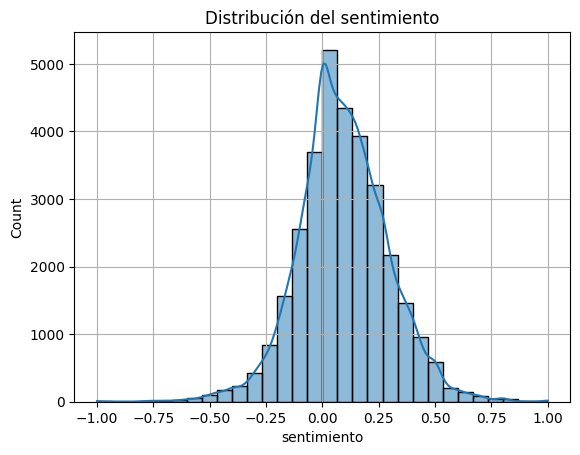

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df2['sentimiento'], bins=30, kde=True)
plt.title('Distribución del sentimiento')
plt.grid()
plt.show()

La mayoría de las canciones tienden a ser más positivas (recordar que la métrica para ver positividad solo es la cantidad de adjetivos positivos)

Artistas con sentimiento promedio más positivo

In [83]:
df2.groupby('artists')['sentimiento'].mean().sort_values(ascending=False).head(10)

artists
At17                                   1.000000
Vini Vici;Pixel                        0.976562
Evil Activities;Chaosphere             0.850000
yetep;Olmos                            0.850000
Shenseea;Tyga                          0.827018
ILLENIUM;Call Me Karizma;Hex Cougar    0.800781
AcesToAces                             0.800000
Neolux                                 0.800000
LiSA                                   0.800000
HYDE                                   0.800000
Name: sentimiento, dtype: float64

Canciones más positivas:

In [84]:
df2.sort_values('sentimiento', ascending=False)[['song', 'artists', 'sentimiento']].head(5)  # más positivas
df2.sort_values('sentimiento')[['song', 'artists', 'sentimiento']].head(5)  # más negativas

,song,artists,sentimiento
35318,Mortado,Impetigo,-1.0
7518,DRAMATIC? DRASTIC!,BOØWY,-1.0
29835,Faith,Ghost,-1.0
22776,Sentence,ERA,-1.0
64617,I Wanna Be Sedated,Ramones,-1.0


### Merge con el dataframe original

In [85]:
original = pd.read_csv(r"data\data_principal.csv")
original = original.drop(columns=['Unnamed: 0'])

spotify = df2.merge(original, on="track_id", how="left")
spotify = spotify.drop_duplicates()
spotify.head()

,track_id,artists_x,song,lyrics,idioma,sentimiento,subjetividad,clasificacion,artists_y,album_name,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,4aY2hh55axhL2qYYqXNoOM,"""Puppy Dog Pals"" Cast",Going on a Mission,"Let's go!\n ♪\n On your bark, get ready, got a...",en,0.423854,0.603333,positivo,"""Puppy Dog Pals"" Cast",Puppy Dog Pals: Disney Junior Music,...,-3.839,0,0.0470,0.02100,0.000000,0.093,0.957,93.937,3,children
1,5qtlopq4SnnvVeiQVt3M0n,"""Puppy Dog Pals"" Cast",Puppy Dog Pals Main Title Theme,"Bingo and Rolly, couple of puppies\n They bark...",en,-0.100000,0.200000,neutral,"""Puppy Dog Pals"" Cast",Puppy Dog Pals: Disney Junior Music,...,-4.709,1,0.2020,0.17100,0.001410,0.202,0.873,182.148,4,children
2,6He7HGAK721bVRUv3l6hwc,"""Weird Al"" Yankovic",Good Enough for Now,"Oh, I couldn't live a single day without you\n...",en,0.245615,0.588183,positivo,"""Weird Al"" Yankovic",Polka Party,...,-13.015,1,0.0291,0.04750,0.000000,0.209,0.855,130.758,4,comedy
3,6LlUAzeDR4D5y0YsCkAlFO,"""Weird Al"" Yankovic","Gump (Parody of ""Lump"" by The Presidents of th...","Gump sat alone on a bench in the park\n ""My na...",en,-0.057212,0.612821,neutral,"""Weird Al"" Yankovic","The Essential ""Weird Al"" Yankovic",...,-6.505,1,0.0390,0.00837,0.000002,0.294,0.907,144.354,4,comedy
4,4uPOZjjtf8hwD7uxArwVh4,"""Weird Al"" Yankovic","Trapped In the Drive-Thru (Parody of ""Trapped ...",Seven o'clock in the evening\n Watchin somethi...,en,-0.017307,0.514231,neutral,"""Weird Al"" Yankovic","The Essential ""Weird Al"" Yankovic",...,-8.998,1,0.0880,0.46000,0.000000,0.222,0.692,108.061,4,comedy


Este dataframe contiene las canciones del dataframe original combinado con el dataframe de letras con sentimiento.

Algunas canciones se repiten porque tienen asociado más de un género.

Ahora, explorando la nueva información:

In [86]:
# TF-IDF con todo el corpus, pero de nuevo porque cambió la base al hacer el merge
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = vectorizer.fit_transform(spotify['lyrics'])
feature_names = vectorizer.get_feature_names_out()

tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=feature_names)
tfidf_df['track_genre'] = spotify['track_genre'].values

# Ver los géneros más comunes
top_generos = spotify['track_genre'].value_counts().head(10).index

for genero in top_generos:
    media = tfidf_df[tfidf_df['track_genre'] == genero].drop(columns='track_genre').mean()
    top_words = media.sort_values(ascending=False).head(10) # podemos ver más palabras subiendo el 10
    print(f"\n🎧 Palabras más representativas del género '{genero}':")
    print(", ".join(top_words.index))


🎧 Palabras más representativas del género 'grunge':
away, ll, don, ve, know, oh, like, just, yeah, let

🎧 Palabras más representativas del género 'metalcore':
don, know, ve, ll, just, like, let, feel, away, fucking

🎧 Palabras más representativas del género 'country':
christmas, don, like, love, just, got, oh, ain, ll, know

🎧 Palabras más representativas del género 'soul':
christmas, oh, love, yeah, baby, claus, know, santa, merry, don

🎧 Palabras más representativas del género 'sad':
don, yeah, know, like, just, love, wanna, got, ll, cause

🎧 Palabras más representativas del género 'dance':
oh, la, yeah, baby, like, know, don, love, just, got

🎧 Palabras más representativas del género 'rock':
oh, christmas, don, ooh, yeah, nick, merry, ll, know, time

🎧 Palabras más representativas del género 'metal':
oh, ve, don, know, away, ll, love, just, yeah, like

🎧 Palabras más representativas del género 'alternative':
oh, don, yeah, love, know, ll, like, just, wanna, ve

🎧 Palabras más repre

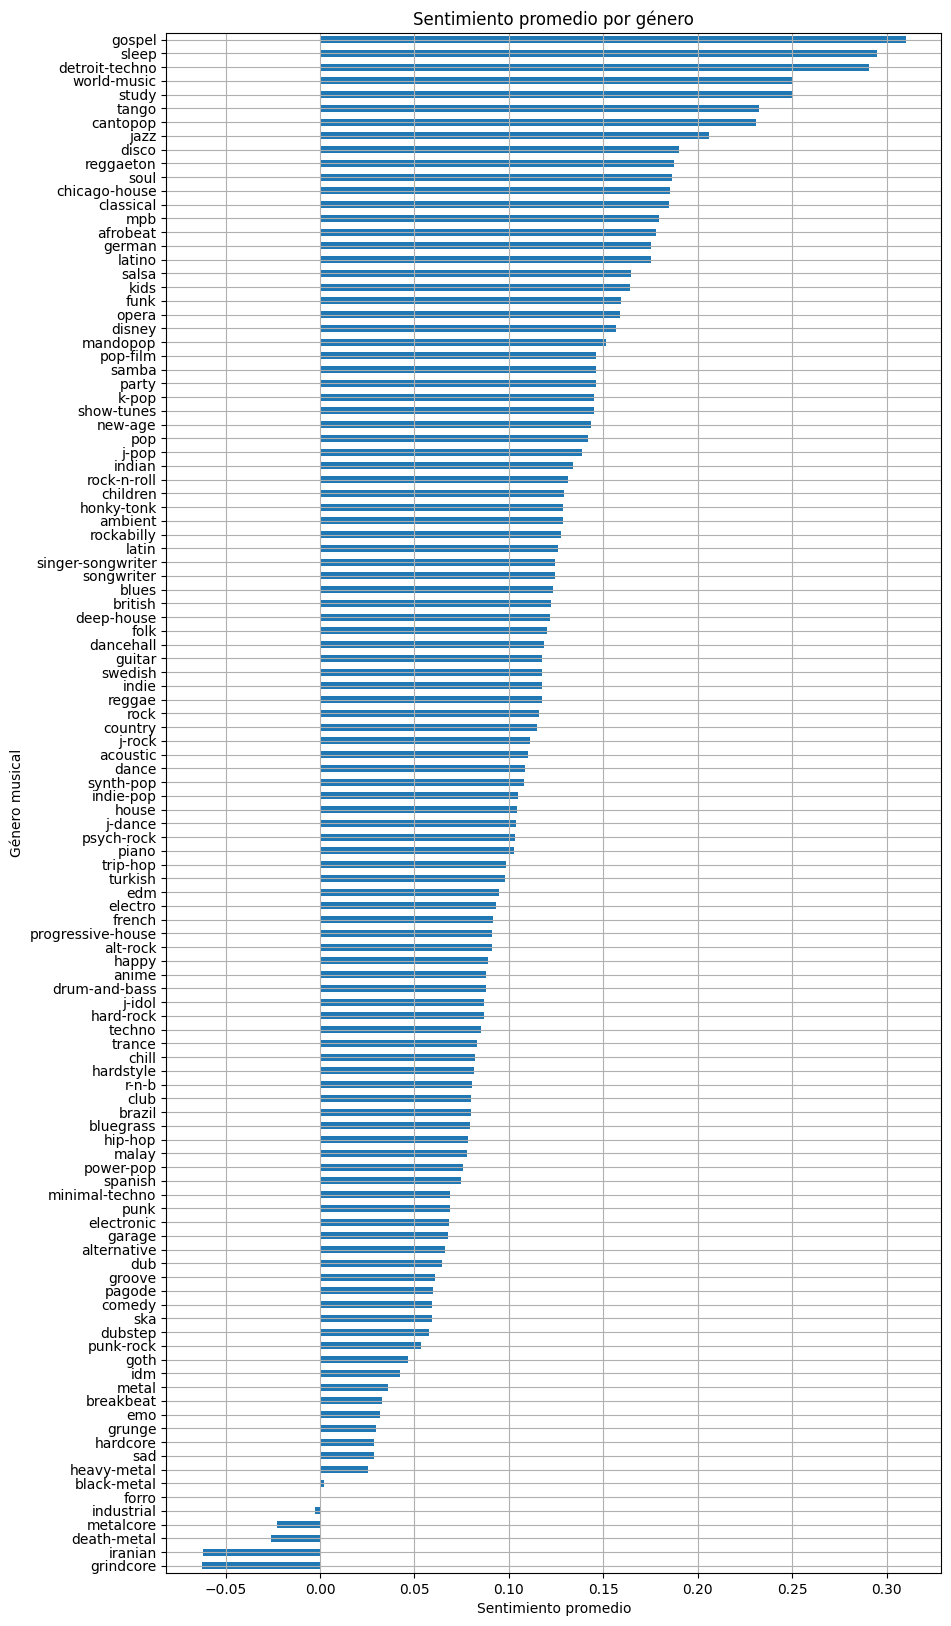

In [87]:
genero_sentimiento = spotify.groupby('track_genre')['sentimiento'].mean().sort_values()

# Mostrar los más felices y más tristes
genero_sentimiento.plot(kind='barh', figsize=(10, 20), title='Sentimiento promedio por género')
plt.xlabel('Sentimiento promedio')
plt.ylabel('Género musical')
plt.grid()
plt.show()

En promedio, la mayoría de los géneros tienen predominantemente sentimientos con polaridad positiva, a excepción de algunos como grindcore, iranian o death-metal.

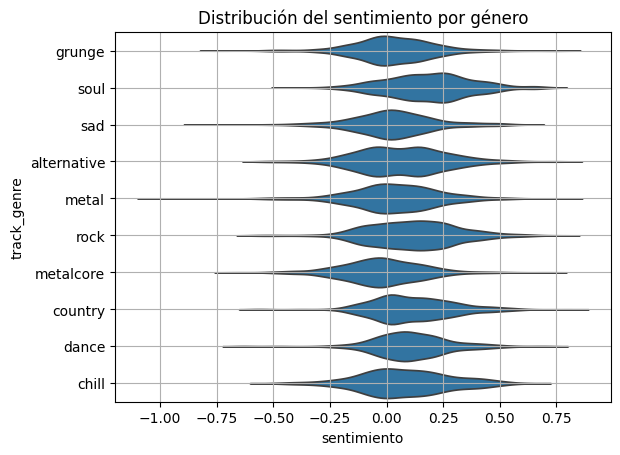

In [88]:
spotify_filtrado = spotify.dropna(subset=['lyrics'])

top_generos = spotify_filtrado['track_genre'].value_counts().head(10).index

sns.violinplot(data=spotify[spotify['track_genre'].isin(top_generos)], 
               x='sentimiento', y='track_genre', orient='h', inner=None, scale='width')
plt.title('Distribución del sentimiento por género')
plt.grid()
plt.show()

Entre los géneros con más representación, se observa predominancia de sentimiento positivo, excepto metalcore.

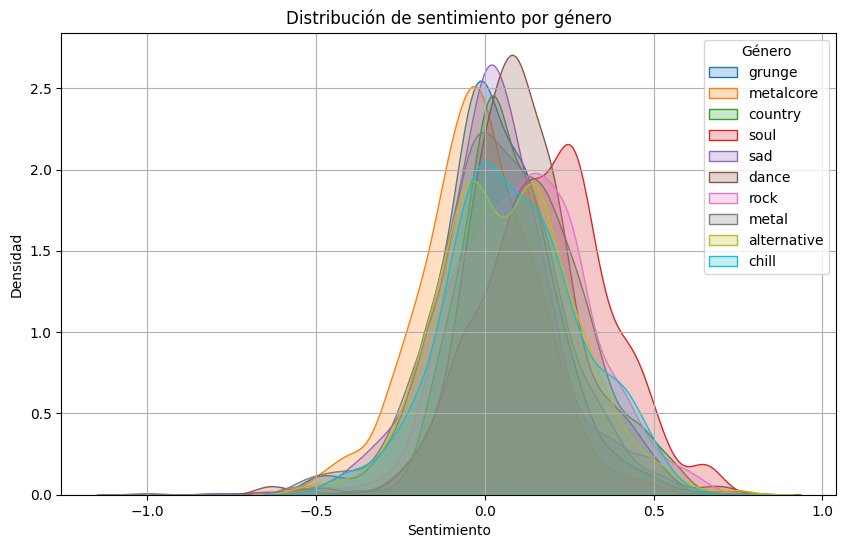

In [89]:
plt.figure(figsize=(10, 6))

for genero in top_generos:
    subset = spotify[spotify['track_genre'] == genero]
    sns.kdeplot(subset['sentimiento'], label=genero, shade=True, common_norm=False)

plt.title('Distribución de sentimiento por género')
plt.xlabel('Sentimiento')
plt.ylabel('Densidad')
plt.legend(title='Género')
plt.grid()
plt.show()

Entre estos mismos géneros, soul es el que tiene una polaridad más positiva.

En general, con la metodología implementada de manera preliminar, es posible representar y caracterizar las canciones, asi como sus diferencias entre los distintos géneros.

Como pasos siguientes, en primer lugar, se debe mejorar la limpieza de los datos, en particular, el preprocesamiento de la letra. Por otra parte, se puede generar embeddings que capturen de mejor manera la semántica de cada letra, y que a su vez permitan caracterizar las canciones de una forma más precisa. Adicionalmente, se puede añadir información relacionada al tiempo de lanzamiento o creación, para realizar el mismo análisis, pero considerando estas características.

# Próximos pasos

Aplicando las mejoras propuestas en cada una de las preguntas, se puede probar el rendimiento del modelo de predicción de género al añadir sucesivamente nueva información, proveniente de la clusterización y de lo obtenido a través de NLP, verificando si aporta a aumentar las métricas correspondientes.

Finalmente, se pueden enriquecer con más información la base de datos completa, agregando atributos como los ya existentes, pero distribuidos a través del tiempo de duración de cada registro, como por ejemplo, volumen promedio durante el 10% inicial de la canción, u otras características que contribuirían a la predicción del género.

## Anexos

---

## P1

Más exploración

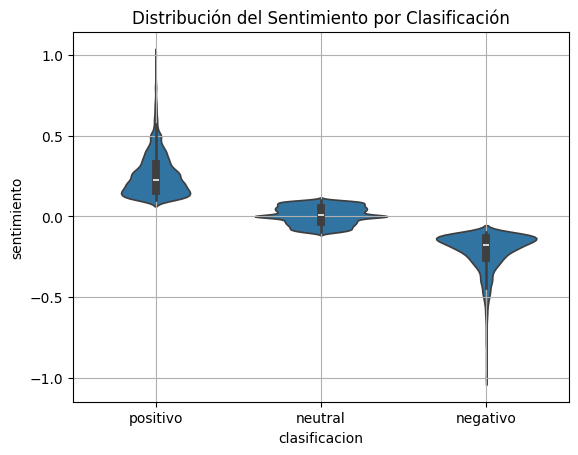

In [90]:
sns.violinplot(data=df2, x='clasificacion', y='sentimiento')
plt.title('Distribución del Sentimiento por Clasificación')
plt.grid()
plt.show()

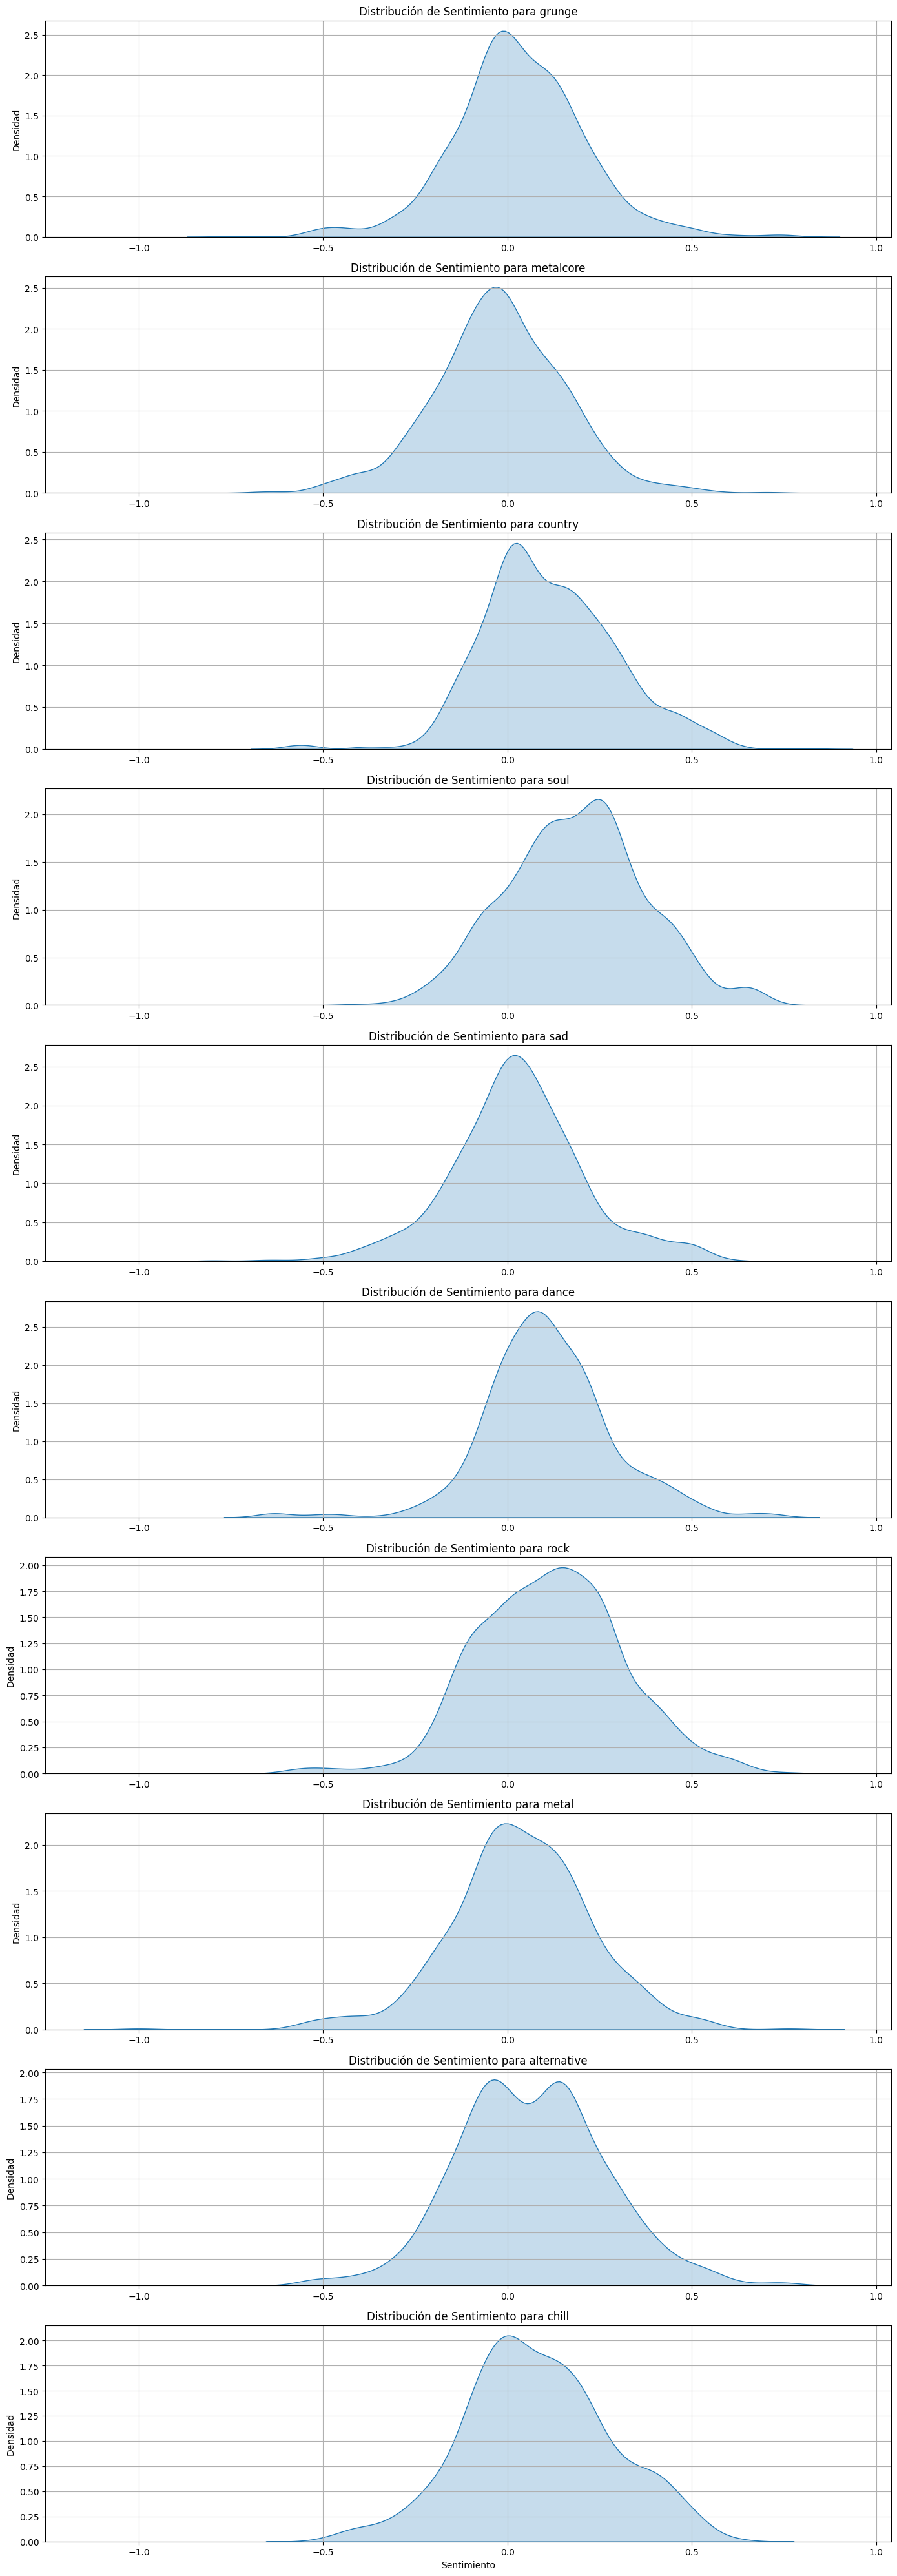

In [91]:
fig, axes = plt.subplots(len(top_generos), 1, figsize=(14, 4 * len(top_generos)), sharex=True)

for i, genero in enumerate(top_generos):
    subset = spotify[spotify['track_genre'] == genero]
    sns.kdeplot(subset['sentimiento'], ax=axes[i], shade=True, common_norm=False)
    axes[i].set_title(f'Distribución de Sentimiento para {genero}')
    axes[i].set_xlabel('Sentimiento')
    axes[i].set_ylabel('Densidad')
    axes[i].grid(True)
    axes[i].tick_params(axis='x', labelbottom=True)

plt.tight_layout()
plt.show()

Separando las disitribuciones, se puede confirmar que soul contiene canciones con sentimientos más positivos, en comparación al resto.